<h1> Exercise 1

>Data Handling exercise

<p style="color:orange"> This exercise is for those who are already familiar with python


# A Visual Exploration and Statistical Analysis of a Diabetes Dataset using Python
## This Dataset is Freely Available

### Overview:
The data was collected and made available by the "National Institute of Diabetes and Digestive and Kidney Diseases" as part of the Pima Indians Diabetes Database. 

`Diabetes.csv` is available [from Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). 
++++++++++++++++++++++++++++++++++++

The following features are present in the dataset:
* **Pregnancies:**  Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


## Scenario: Imagine you have collected this data and wish to analyse it

<p> In Moodle, you are going to work with a data named "Diabetess.csv". 
<p> It is the same  Diabetes dataset but saved as "Diabetess.csv" for this exercise.

<h3> A. Here are the expected things to do in this exercise

>1. Import the necessary/required libraries.
>
>2. Load the data (Diabetes.csv)
>
>3. Show the information about the data.
>
>4. Describe the data
>>>>> **Points allocated for this step:** (0.5 point)

In [ ]:
pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the input data to dataframe.
df = pd.read_csv('Diabetess.csv')

In [ ]:
#See how data looks.
df.head()

In [ ]:
#Check for null values.
df.isnull()

In [ ]:
#list all the columns and data types. Check if features/label are missing data.
df.info()

Glucose, Insulin and BMI missing data. Insuling almost 50% missing data. Replace with values or remove after analysis.

In [ ]:
#Check data ranges and potential outliers. How is ditribution. 
df.describe()

<h3> B. Handle the missing data

### Missing and Zero Values

* It is clear the data has missing and zero values
* For example, we can see that SkinThickness = 0 in the third row
* And we can also see some 'NaN' values
* Sometimes missing values are represented by a '?'
* Get more info and decide on how to handle these issues as instructed below:

> 5. If the data uses '?' for missing values then we can replace them with a NaN.

## Insulin has a large number of missing values .. so we can drop that column

> 6. Drop all rows that contain missing values.
>
> 7. Drop all rows that contain missing values?
>
> 8. Show the shape of the data.
>
> 9. Describe the data.
>
> 10. Show the information of the cleaned data.
>

>>>>> **Points allocated for this step:** (0.5 point)

#### The Mean and Median

* **The mean** is the simple mathematical average of a list of two or more numbers. 
* **The median** is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average.

https://www.investopedia.com/terms-beginning-with-m-4769363

#### Zero Values that Don't Make Sense

<p> In case you want would like to replace the missing values by the mean or median value
<p> Here is an example of the code below

In [3]:
### Replace missing values in each column with the mean or median of that column. 
#data = df.fillna(df.mean())
#data = df.fillna(df.median())
#data = pd.concat([df.ffill(), df.bfill()]).groupby(level=0).median()
#Fill in missing insuling data according to outcome type insulin mean.
tmp = df[df['Insulin'].notnull()]
tmp = tmp[['Insulin', 'Outcome']].groupby(['Outcome'])[['Insulin']].mean().reset_index()
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = tmp.iloc[0]['Insulin']
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = tmp.iloc[1]['Insulin']
data=df.fillna(df.mean())

<p> In our exercise, remove all the rows with zero with the exception of the first and last columns.

>Here is an example of the code to that:

In [4]:
## get data where non of the columns has 0 value (except the first and last columns). Check the shape.
clean_data = data[~(data[data.columns[1:-1]] == 0).any(axis=1)]
clean_data.shape

(539, 9)

In [ ]:
#Have a look on cleaned data.
clean_data.head(20)

In [ ]:
#All the features/attributes and label have same count!! No missing or null values found.
clean_data.info()

### Some Summary Information

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [ ]:
#Check the data ranges once more.
clean_data.describe()

In [ ]:
## check the mean of values depending on their category (i.e. 0 or 1)
clean_data.groupby('Outcome').mean()

In [ ]:
# the difference between the mean and median is a good indicator of how much skewed your data is!
clean_data.groupby('Outcome').agg(['mean','median'])

Insulin mean and median delta is elevated. This is for cases with diabetes. NaN mean/meadian replacement might not be correct way to do it. Further analysis shows it is elevated even before NaN replacement. One option is to drop 'Insulin' column from final data.

# 2- Useful and Informative Plots

## Histogram Plots

<p> Plot the histogram plots of each variable </p>

> Allocated points (1 point)

In [ ]:
#Histogram plots
plt.figure(figsize=(16,12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    col = clean_data.columns[i-1]
    plt.hist(clean_data[col], bins=30)
    plt.title(col)

## Scatter Matrix

* This one is a useful one liner ... but note that it only works with numeric data
* If you want to include categorical data in there you should convert the categories into numeric labels

> Allocated points (1 point)

In [ ]:
#Scatter matrix, Outcome used for coloring scheme. Blue - No, Orange - yes
sns.pairplot(clean_data, hue="Outcome")

It looks Glucose have stronger correlation with outcome and other features. Distribution for non-diabetes cases show normal distribution. Positive cases show some non-normal distribution. Will this require normalization?

In [ ]:
#Let's have closer look on some of the data.
fig, ax = plt.subplots()
x=clean_data['BMI']
y=clean_data['Glucose']
ax.scatter(x, y, c=clean_data['Outcome'], s=clean_data['Glucose']/2)
ax.legend(x)
ax.grid(True)
plt.show()

In [ ]:
#3D plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = clean_data['Age']
y = clean_data['BMI']
z = clean_data['Glucose']
ax.scatter(x, y, z,c=clean_data['Outcome'])
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Glucose")

plt.show()

In [ ]:
#Heatmap for feature and label correlation.
corr = clean_data.corr()
sns.heatmap(corr, annot=True)

## Conclusion

<p> You can submit the exercise by submitting the Jupyter notebook file (ipynb) or as pdf

>The main aim of this exercise is to explore the data and handle the possibility of missing data (rows or columns)

Notes from histograms and scatter matrix.###

Insulin Null data replaced with mean or median will create high spike for this category as almost half of the data is not available. This potentially can skew the outcome. Look for other option to replace missing value. bfill/ffill used. Also Insulin-Glucose there is a correlation according to heatmap. Other option to fill missing insulin values taking values matching Glucose.
Clucose level has high correlation to outcome.
Age is not evenly balanced as most samples are <50 years. Check accuracy of model once trained.
Non-diabetics are double amount in 'Outcome' category. Not totally balanced data but still workable.
Model training and validation will show if any further data wrangling is needed.
Scaling and normalization also options.

<p> The same data will be used for exercise 2.
<p> Exercise 2 continues from here.

# Well Done!

<h1> Exercise 2 Classification task

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [6]:
features = clean_data.drop(columns='Outcome')
#labels = np.array(clean_data['Outcome'])
labels = clean_data['Outcome']

In [7]:
#Scaling the data. Logistic regression is not much affcted if no scaling done. NN model big improvemnet seen with scaling.
#I believe it is because weighting inside the network layers requires scaled input data to reduce bias.
st = StandardScaler()
features_sca = st.fit_transform(features)
features_sca.shape

(539, 8)

<h3> A: Logistic Regression Model

In [40]:
#Split the data.
X_train, X_test, y_train, y_test = train_test_split(features_sca, labels, test_size=0.4, random_state=24)

In [41]:
#'class_weight' added and tried as number of diabetics is much less than non-diabetics in given database. 
#This improves diabetic recal rate from mid 50% to >70%. But overall model accuracy decreases. 
#l_clf = LogisticRegression(solver='liblinear', C=10.0, random_state=0, class_weight='balanced')#0.79
l_clf = LogisticRegression(random_state = 6, 
                           solver = 'liblinear', 
                           #class_weight='balanced',
                           multi_class='ovr',
                           penalty='l2')

In [42]:
#Fit the model
l_clf.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=6, solver='liblinear')

In [43]:
#Create training KPIs
p_pred = l_clf.predict_proba(X_train)
y_pred = l_clf.predict(X_train)
score_ = l_clf.score(X_train, y_train)
conf_m = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

In [13]:
#Create test KPIs
p_pred = l_clf.predict_proba(X_test)
y_pred = l_clf.predict(X_test)
score_ = l_clf.score(X_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
#Function for confusion matrix creation.
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [44]:
#Print accuracy using confusion matrix.
print('Confusion matrix:\n',conf_m)
print("Accuracy of LogisticRegression : ", accuracy(conf_m))

Confusion matrix:
 [[194  23]
 [ 46  60]]
Accuracy of LogisticRegression :  0.7863777089783281


In [ ]:
#Print complete KPI report.
print('report:', report, sep='\n')

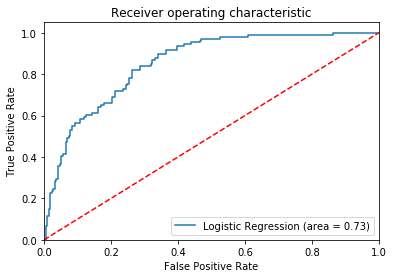

In [16]:
#ROC curve.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_train, l_clf.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, l_clf.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h3> A: Neural Network

In [17]:
 from sklearn.neural_network import MLPClassifier

In [20]:
#Create NN network layout. 
clf = MLPClassifier(solver='adam', #adam
                     #alpha=1e-4, 
                     hidden_layer_sizes=(150,100,50), #150 best. 80 with lbfgs
                     random_state=24, 
                     batch_size=8, 
                     verbose=False,
                     early_stopping=True,
                     activation='relu',
                     learning_rate='constant',
                     learning_rate_init=0.01,
                     max_iter=300
                     )

In [21]:
#Fit the model.
clf.fit(X_train, y_train)

MLPClassifier(batch_size=8, early_stopping=True,
              hidden_layer_sizes=(150, 100, 50), learning_rate_init=0.01,
              max_iter=300, random_state=24)

In [22]:
#Model training performance.
print("MLP training accuracy:",clf.score(X_train, y_train))

MLP training accuracy: 0.826625386996904


In [23]:
#Model prediction performance.
print("MLP test accuracy:",clf.score(X_test, y_test))

MLP test accuracy: 0.8194444444444444


In [ ]:
#Check what is probability of each test prediction.
clf.predict_proba(X_test)

In [24]:
#NN model accuracy usint test data.NO NEED AS SAME AS TWO CELLS UP.
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8194444444444444


In [ ]:
#Check delta between prediction and real label.
dat1 = pd.DataFrame(y_test)
dat1['Prediction'] = y_pred
dat1.head(20)

In [25]:
#Show model parameters.
clf.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 8,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 24,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

<h3> B: Feature selection. Only BMI, glucose and age selected.

In [26]:
#Feature selection, drop features, only use glucose, BMI and age..

features_sel = clean_data.drop(columns=['Pregnancies', 
                               'BloodPressure', 
                               'SkinThickness',
                               'Insulin', 
                               'DiabetesPedigreeFunction'])

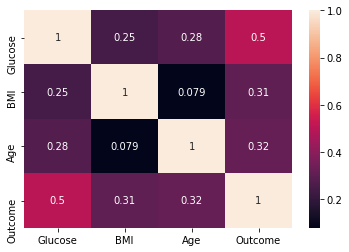

In [27]:
#Check correlation of selected features with label.Glucose has the highest correlation with Outcome.
sns.heatmap(features_sel.corr(),annot=True)
plt.show()

In [28]:
st = StandardScaler()
features_sca2 = st.fit_transform(features_sel.drop(columns=['Outcome']))
features_sca2.shape

(539, 3)

In [51]:
#Split the data. Instructions has keep test data size 0.001.That would leave no data for testing as there are 
#less than 1000 samples. I kept same 40% as a size.
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(features_sca2, labels, test_size=0.4, random_state=24)#0.4 good

<h3> B: Logistic Regression Model

In [52]:
#Logistic regression model. Using only three features. Class wirght also tested as diabetic outcome is only about 
#35% of all.
l_clf = LogisticRegression(random_state = 6, 
                           solver = 'liblinear', 
                           #class_weight='balanced',
                           multi_class='ovr',
                           penalty='l2')
#Fit the model
l_clf.fit(X_train_sub, y_train_sub)
#Create training KPIs
p_pred = l_clf.predict_proba(X_train_sub)
y_pred = l_clf.predict(X_train_sub)
score_ = l_clf.score(X_train_sub, y_train_sub)
conf_m = confusion_matrix(y_train_sub, y_pred)
report = classification_report(y_train_sub, y_pred)
y_pred.shape
#Confusion matrix.
print('Confusion matrix:\n',conf_m)
#Accuracy
print("Accuracy of MLPClassifier : ", accuracy(conf_m))

Confusion matrix:
 [[191  26]
 [ 47  59]]
Accuracy of MLPClassifier :  0.7739938080495357


In [ ]:
#Print complete KPI report.
print('report:', report, sep='\n')

Observation: Not much delta on result after feature selection. 77.4% vs.78.6%. 

<h3> B: NN Model

In [47]:
#Create NN network layout. 
clf_sub = MLPClassifier(solver='adam', 
                     alpha=1e-4, 
                     hidden_layer_sizes=(150,100,50), #150 best. 80 with lbfgs
                     random_state=24, 
                     batch_size=8, 
                     verbose=False,
                     early_stopping=True,
                     activation='relu',
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     max_iter=300
                     )

In [48]:
#Fit the NN model with new data.
clf_sub.fit(X_train_sub, y_train_sub)

MLPClassifier(batch_size=8, early_stopping=True,
              hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=24)

In [49]:
#NN model training performance.
print("MLP training accuracy:",clf_sub.score(X_train_sub, y_train_sub))

MLP training accuracy: 0.8234200743494424


In [50]:
#NN model test performance.
print("MLP test accuracy:",clf_sub.score(X_test_sub, y_test_sub))

MLP test accuracy: 1.0


Observation: 
NN network training accuracy went down after feature selection. 77.7% vs 82.6%. It seem NN is able to find 
more information from the excluded data.

<h3> C: Assuming a patient just has just walked into a clinic. The clinician wants to predict his/her outcome.

In [36]:
#The patients' age is 35 years with a glucose level of 110 and BMI of 35. 
patient1 = pd.DataFrame({'Glucose':[110], 'BMI':[35], 'Age':[35]})
patient_scaled = st.fit_transform(patient1)

In [37]:
#Logistic regression patient outcome prediction.
y_pred_prob = l_clf.predict_proba(patient_scaled)
y_pred = l_clf.predict(patient_scaled)
print("Outcome =", y_pred, "LRM Probability =",y_pred_prob)

Outcome = [0] LRM Probability = [[0.71778425 0.28221575]]


LR model prediction is '0', non-diabetic. Probability is 71.7%.

In [38]:
#NN patient outcome prediction.
y_pred_prob = clf_sub.predict_proba(patient_scaled)
y_pred = clf_sub.predict(patient_scaled)
print("Outcome =", y_pred, "MLPC Probability =",y_pred_prob)

Outcome = [0] MLPC Probability = [[0.59938852 0.40061148]]


NN model prediction is '0', non-diabetic. Probability is 60%.

<h3> Well done...Submit your Python file as pdf file or as a python file.